In [52]:
import matplotlib.pyplot as plt
import numpy as np

true_labels = np.genfromtxt("hw06_true_labels.csv", delimiter = ",", dtype = "int")
predicted_probabilities = np.genfromtxt("hw06_predicted_probabilities.csv", delimiter = ",")

In [53]:
# STEP 3
# given the predicted probabilities of size (N,),
# it should return the calculated thresholds of size (N + 1,)
def calculate_threholds(predicted_probabilities):
    # your implementation starts below
    zero = np.asarray([0]).astype(float)
    one = np.asarray([1]).astype(float)
    extended_array = np.sort(np.hstack((zero, predicted_probabilities, one)))
    thresholds = (extended_array[1:] + extended_array[:-1]) / 2
    # your implementation ends above
    return thresholds

thresholds = calculate_threholds(predicted_probabilities)
print(thresholds)



[0.00603665 0.01329955 0.02200585 ... 0.9655685  0.9670935  0.9836335 ]


In [54]:
# STEP 4
# given the true labels of size (N,), the predicted probabilities of size (N,) and
# the thresholds of size (N + 1,), it should return the FP and TP rates of size (N + 1,)
def calculate_fp_and_tp_rates(true_labels, predicted_probabilities, thresholds):
    # your implementation starts below
    N = true_labels.size
    fp_rates = np.zeros(N + 1).astype(float)
    tp_rates = np.zeros(N + 1).astype(float)
    
    for i in range(len(thresholds)):
        predicted_labels = predicted_probabilities > thresholds[i]
        tp_rates[i] = np.sum((predicted_labels == True) & (true_labels == 1)) / np.sum(true_labels == 1)
        fp_rates[i] = np.sum((predicted_labels == True) & (true_labels == -1)) / np.sum(true_labels == -1)
    # your implementation ends above
    return fp_rates, tp_rates

fp_rates, tp_rates = calculate_fp_and_tp_rates(true_labels, predicted_probabilities, thresholds)
print(fp_rates)
print(tp_rates)

[1.         0.99802372 0.99604743 ... 0.         0.         0.        ]
[1.         1.         1.         ... 0.00404858 0.00202429 0.        ]


In [66]:
sum = 0.0 # FLOAT
#print((fp_rates[0] - fp_rates[1]) * (tp_rates[0] + tp_rates[1]) / 2)
for i in range(len(tp_rates) - 1):
    area = (fp_rates[i] - fp_rates[i + 1]) * (tp_rates[i] + tp_rates[i + 1]) / 2
    sum += area

print(sum)

0.9064465283000738


In [67]:
area = np.sum([(fp_rates[i] - fp_rates[i + 1]) * (tp_rates[i] + tp_rates[i + 1]) / 2 for i in range(len(tp_rates) - 1)])
print(area)

0.9064465283000751


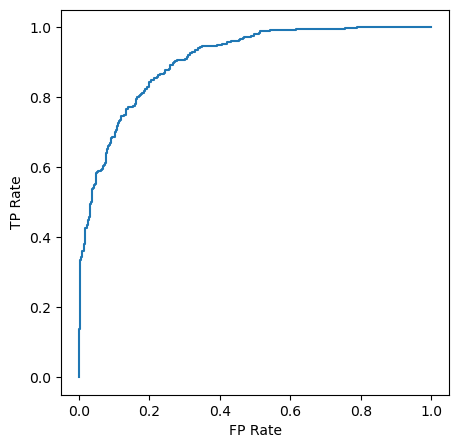

In [55]:
fig = plt.figure(figsize = (5, 5))
plt.plot(fp_rates, tp_rates)
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.show()
fig.savefig("hw06_roc_curve.pdf", bbox_inches = "tight")

In [68]:
# STEP 5
# given the FP and TP rates of size (N + 1,),
# it should return the area under the ROC curve
def calculate_auroc(fp_rates, tp_rates):
    # your implementation starts below
    auroc = np.sum([(fp_rates[i] - fp_rates[i + 1]) * (tp_rates[i] + tp_rates[i + 1]) / 2 for i in range(len(tp_rates) - 1)])
    # your implementation ends above
    return auroc

auroc = calculate_auroc(fp_rates, tp_rates)
print("The area under the ROC curve is {}.".format(auroc))

The area under the ROC curve is 0.9064465283000751.
